In [ ]:
!pip install diffusers

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd
from torch import nn, optim
from diffusers import StableDiffusionPipeline

In [ ]:
from PIL import Image

In [ ]:
!pip show torch

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision


In [ ]:
df = pd.read_csv("preprocessed_dataset.csv")

In [ ]:
df

,Location,Time,Scripts,Preprocessed_Scripts
0,NaN,NaN,"A QUIET PLACE Screenplay by Bryan Woods, S...",A QUIET PLACE Screenplay Bryan Woods Scott Bec...
1,EXT. TOWN,LATE AFTERNOON,We come up on... a streetlight. There is no il...,We come streetlight There illumination movemen...
2,INT. GENERAL STORE,LATE AFTERNOON,Slowly pushing through the doorway of a large ...,Slowly pushing doorway large general store als...
3,INT. GENERAL STORE AISLES,LATE AFTERNOON,"WE MOVE SLOWLY across the floor, down the midd...",WE MOVE SLOWLY across floor middle general sto...
4,INT. AISLE,LATE AFTERNOON,"A 10 year old girl stands on her toes, barely ...",A year old girl stand toe barely able see wood...
...,...,...,...,...
119,INT. FARMHOUSE,DAWN,CLOSE ON MONITORS... As EVELYN's face comes in...,CLOSE ON MONITORS As EVELYNs face come frame O...
120,INT. FARMHOUSE,DAWN,CLOSE ON LEE's shotgun laying on the floor. Su...,CLOSE ON LEEs shotgun laying floor Suddenly EV...
121,INT. FARMHOUSE,DAWN,"THROUGH THE LIVING ROOM WINDOW, WE LOOK OUT on...",THROUGH THE LIVING ROOM WINDOW WE LOOK OUT ont...
122,INT. FARMHOUSE,DAWN,WE LOOK DIRECTLY up the basement stairs toward...,WE LOOK DIRECTLY basement stair toward warm ha...


In [ ]:
scene_texts = df['Preprocessed_Scripts'].tolist()

In [ ]:
scene_texts

['A QUIET PLACE Screenplay Bryan Woods Scott Beck John Krasinski Story Bryan Woods Scott Beck BLACK We hear clearly sound light wind',
 'We come streetlight There illumination movement We hold long moment suddenly The streetlight bob begin sway We slowly begin rise streetlight reveal small bird landed We continue rise reveal behind bird Wind blow gargantuan evergreen seem engulf narrow main street small town upstate New York Shop window car either side covered dust place seems frozen time There movement In middle road one see sand A bizarre incongruity long pathway shovel width run full length street offshoot open doorway shop We hold long moment',
 'Slowly pushing doorway large general store also covered dust To left cash register small shelf nearly empty candy box To right towering shelf full bag potato chip nacho chip pretzel None missing',
 'WE MOVE SLOWLY across floor middle general store Amid towering shelf good either side one may recognize barely perceptible pattern shelf bare 

### Now we will call a pre trained stable diffusion model and directly use it.

In [ ]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Now we will call Stable Diffusion models and schedulers, tokenizers, unet architectures and variable encoders. Then we have also changed various parameters and fine tuned the base stable diffusion model.

In [ ]:
torch_device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae")

tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
text_encoder = CLIPTextModel.from_pretrained("openai/clip-vit-large-patch14")

unet = UNet2DConditionModel.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="unet")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

In [ ]:
from diffusers import LMSDiscreteScheduler

scheduler = LMSDiscreteScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler")

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

In [ ]:
vae = vae.to(torch_device)
text_encoder = text_encoder.to(torch_device)
unet = unet.to(torch_device)

In [ ]:
height = 512
width = 512

num_inference_steps = 200

guidance_scale = 7.5

generator = torch.manual_seed(32)

batch_size = 1

In [ ]:
prompt_1 = scene_texts[1]
prompt_1

'We come streetlight There illumination movement We hold long moment suddenly The streetlight bob begin sway We slowly begin rise streetlight reveal small bird landed We continue rise reveal behind bird Wind blow gargantuan evergreen seem engulf narrow main street small town upstate New York Shop window car either side covered dust place seems frozen time There movement In middle road one see sand A bizarre incongruity long pathway shovel width run full length street offshoot open doorway shop We hold long moment'

In [ ]:
prompt_2 = scene_texts[2]
prompt_2

'Slowly pushing doorway large general store also covered dust To left cash register small shelf nearly empty candy box To right towering shelf full bag potato chip nacho chip pretzel None missing'

In [ ]:
prompt_3 = scene_texts[3]
prompt_3

'WE MOVE SLOWLY across floor middle general store Amid towering shelf good either side one may recognize barely perceptible pattern shelf bare There movement No sound Suddenly TINY FEET JUMP INTO OUR MOVING FRAME Then fast appeared Theyre gone WE NOW MOVE UP side store looking one aisle next As arrive next aisle catch glimpse A SMALL DARK FIGURE And gone WE CONTINUE along side store arrive last aisle At far end store see counter With window And shelf Suddenly A WOMAN APPEARS IN THE WINDOW WE GO CLOSE ON THE WOMAN scan shelf slowly lowering ground behind see year old boy sitting slumped wall HE IS BAREFOOT On closer inspection see sweat boy brow skin pale fever The woman knee touch ground next boy see shes looking She reach hand WE GO CLOSE ON HER HAND reach toward shelf orange prescription drug bottle Her hand suddenly begin shift certain bottle ever slightly AT A BIZARRELY SLOW PACE make sound As get first glimpse name Names drug Names people HER HAND finally arrives back shelf gently

In [ ]:
text_input = tokenizer(prompt_3, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")

with torch.no_grad():
  text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

In [ ]:
max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer(
    [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
)
with torch.no_grad():
  uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

In [ ]:
text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

In [ ]:
latents = torch.randn(
  (batch_size, unet.in_channels, height // 8, width // 8),
  generator=generator,
)
latents = latents.to(torch_device)

<ipython-input-27-132bcdf2870d>:2: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (batch_size, unet.in_channels, height // 8, width // 8),


In [ ]:
latents.shape

torch.Size([1, 4, 64, 64])

In [ ]:
scheduler.set_timesteps(num_inference_steps)

In [ ]:
latents = latents * scheduler.init_noise_sigma

In [ ]:
from tqdm.auto import tqdm
from torch import autocast

for t in tqdm(scheduler.timesteps):
  latent_model_input = torch.cat([latents] * 2)

  latent_model_input = scheduler.scale_model_input(latent_model_input, t)

  with torch.no_grad():
    noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample
  noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
  noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

  latents = scheduler.step(noise_pred, t, latents).prev_sample

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
latents = 1 / 0.18215 * latents

with torch.no_grad():
  image = vae.decode(latents).sample

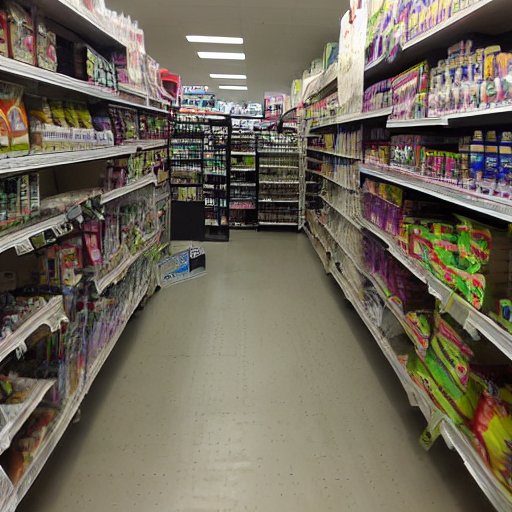

In [ ]:
image = (image / 2 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]

In [ ]:
for i, scene_text in enumerate(scene_texts):
  text_input = tokenizer(scene_text, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")

  with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

  max_length = text_input.input_ids.shape[-1]
  uncond_input = tokenizer(
      [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
  )
  with torch.no_grad():
    uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

  text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

  latents = torch.randn(
  (batch_size, unet.in_channels, height // 8, width // 8),
  generator=generator,)

  latents = latents.to(torch_device)

  scheduler.set_timesteps(num_inference_steps)

  latents = latents * scheduler.init_noise_sigma

  for t in tqdm(scheduler.timesteps):
    latent_model_input = torch.cat([latents] * 2)

    latent_model_input = scheduler.scale_model_input(latent_model_input, t)

    with torch.no_grad():
      noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

    latents = scheduler.step(noise_pred, t, latents).prev_sample

  latents = 1 / 0.18215 * latents

  with torch.no_grad():
    image = vae.decode(latents).sample

  image = (image / 2 + 0.5).clamp(0, 1)
  image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
  images = (image * 255).round().astype("uint8")
  pil_images = [Image.fromarray(image) for image in images]
  pil_images[0]
  pil_images[0].save(f"scene_{i + 1}.png")

<ipython-input-36-1adcb82f7bfe>:17: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (batch_size, unet.in_channels, height // 8, width // 8),


  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 